### Importing necessary libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
# loading the data into a Pandas DataFrame
data = pd.read_csv("Salary_Data.csv")

### Reading and cleaning the data

In [75]:
data.head()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [76]:
#finding the shape of the data
data.shape

(30, 2)

In [77]:
#sorting the Salary data in an ascending order
data.sort_values("Salary")

,YearsofExperience,Salary
2,1.5,37731.0
0,1.1,39343.0
4,2.2,39891.0
3,2.0,43525.0
1,1.3,46205.0
7,3.2,54445.0
11,4.0,55794.0
5,2.9,56642.0
12,4.0,56957.0
13,4.1,57081.0


In [78]:
#sorting the Years of experience in ascending order
data.sort_values('YearsofExperience')

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [79]:
# removing the rows with empty cells
data.dropna()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [80]:
# removing the duplicates in the dataset
data.drop_duplicates()

,YearsofExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Visualization of the dataset to understand the data in a clearer way

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsofExperience'>

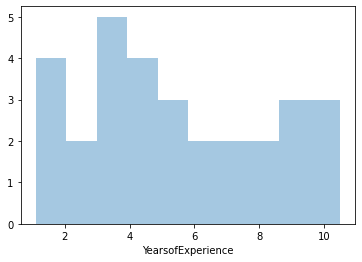

In [81]:
sns.distplot(data['YearsofExperience'],kde=False,bins=10)

<AxesSubplot:xlabel='count', ylabel='YearsofExperience'>

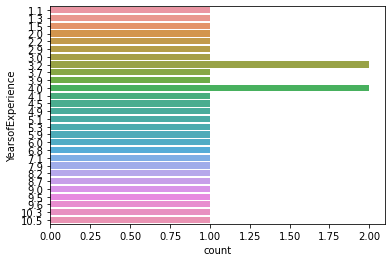

In [82]:
#shows the counts of observations in each categorical bin using bars
sns.countplot(y='YearsofExperience',data=data)

<AxesSubplot:xlabel='YearsofExperience', ylabel='Salary'>

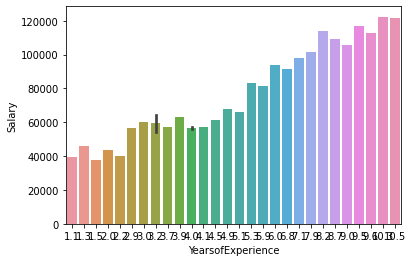

In [83]:
sns.barplot(x='YearsofExperience',y='Salary',data=data)

<AxesSubplot:>

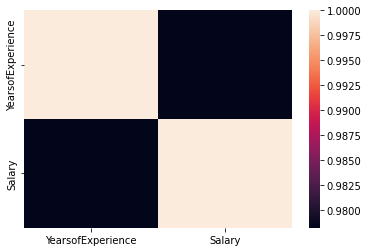

In [84]:
#represents the correlation of data in the columns using a heatmap
sns.heatmap(data.corr())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

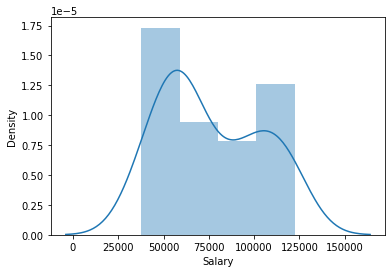

In [85]:
sns.distplot(data.Salary)

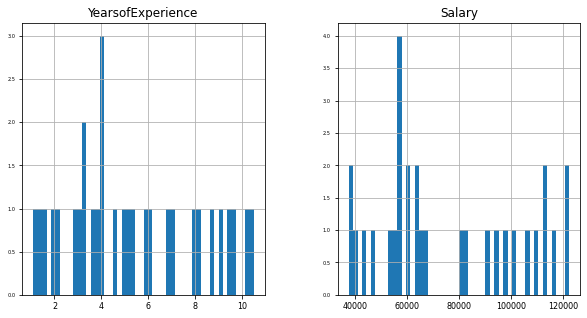

In [86]:
#plotting the distribution of the numerical features with a histogram
data.hist(figsize=(10, 5), bins=50, xlabelsize=8, ylabelsize=5);


In [87]:
#plitting of dataset into independent and dependent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [88]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [89]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


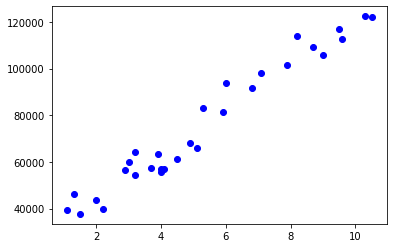

In [90]:
#plotting Scatter plot to check relationship between independent variable and dependent variables
plt.scatter(X, y,color = "blue")

### Training and testing

In [91]:
#splitting the data into training and testng sets
X_train, X_test, y_train, y_test = train_test_split(data[["YearsofExperience"]], data[["Salary"]], test_size=0.33, random_state=0)

In [92]:
print(X_train)

    YearsofExperience
5                 2.9
16                5.1
8                 3.2
14                4.5
23                8.2
20                6.8
1                 1.3
29               10.5
6                 3.0
4                 2.2
18                5.9
19                6.0
9                 3.7
7                 3.2
25                9.0
3                 2.0
0                 1.1
21                7.1
15                4.9
12                4.0


In [93]:
print(y_train)

      Salary
5    56642.0
16   66029.0
8    64445.0
14   61111.0
23  113812.0
20   91738.0
1    46205.0
29  121872.0
6    60150.0
4    39891.0
18   81363.0
19   93940.0
9    57189.0
7    54445.0
25  105582.0
3    43525.0
0    39343.0
21   98273.0
15   67938.0
12   56957.0


In [94]:
print(y_test)

      Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0
27  112635.0
11   55794.0
17   83088.0
22  101302.0


In [95]:
# creating a linear regression model
model = LinearRegression()
#fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [96]:
#predicting the Test set results
y_pred = model.predict(X_test)

In [97]:
#displaying y_pred - Predicted salary
print(y_pred)

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]


In [98]:
#displaying y_test - Actual salary
print(y_test)

      Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0
27  112635.0
11   55794.0
17   83088.0
22  101302.0


In [99]:
#calculating residue errors
residue = y_pred - y_test
print(residue)

         Salary
2   3104.105909
28   688.399408
13  8053.556261
10    47.367772
26 -1366.354546
24 -1305.108501
27  3902.239698
11  8405.962017
17 -6738.312807
22  -652.862455


### Visualizing the training sets results

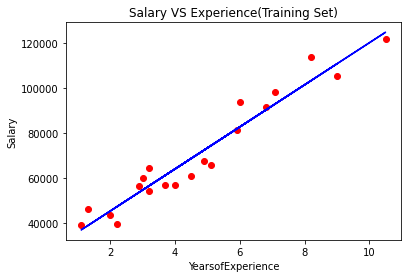

In [100]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("YearsofExperience")
plt.ylabel("Salary")
plt.show()

### Visualizing the testing sets results

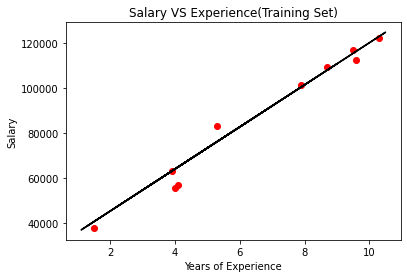

In [101]:
plt.scatter(X_test,y_test,color="Red")
plt.plot(X_train,model.predict(X_train),color="black")
plt.title("Salary VS Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Calculating the Intercept and coefficient

In [102]:
print(model.coef_)
print(model.intercept_)

[[9345.94244312]]
[26816.19224403]


In [103]:
#checking the shape of each predictor
y_test.shape

(10, 1)

In [104]:
y_pred.shape

(10, 1)

### Evaluating the Model

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)                          

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 4585.4157204675885
R2 Score= 0.9749154407708353
